<a href="https://colab.research.google.com/github/lyj041214/ESAA/blob/main/YB0404(2)_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [9]:
# 종속 변수와 예측 결과로 혼동 행렬 생성

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, y_pred)

print(conf_matrix)

[[337  20]
 [ 30 182]]


* 정확도

In [10]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y, y_pred)
print(f"\n정확도: {accuracy:.4f}")


정확도: 0.9121


* 정밀도

In [11]:
from sklearn.metrics import precision_score

# 정밀도 계산
precision = precision_score(y, y_pred)
print("정밀도: {:.4f}".format(precision))

정밀도: 0.9010


* 재현율

In [12]:
from sklearn.metrics import recall_score

# 재현율 계산
recall = recall_score(y, y_pred)
print("재현율: {:.4f}".format(recall))

재현율: 0.8585


* F1 score

In [13]:
from sklearn.metrics import f1_score

# F1 score 계산
f1= f1_score(y, y_pred)
print("F1 score: {:.4f}".format(f1))

F1 score: 0.8792


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [14]:
from sklearn.preprocessing import Binarizer
y_proba = model_lor.predict_proba(X)
y_pred2 = [0 if prob[0] > 0.1 else 1 for prob in y_proba]

In [17]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

# 혼동 행렬 계산
conf_matrix2 = confusion_matrix(y,y_pred2)

# 지표 계산
accuracy2 = accuracy_score(y,y_pred2)
precision2 = precision_score(y,y_pred2)
recall2 = recall_score(y,y_pred2)
f1_2 = f1_score(y,y_pred2)

# 결과 출력
print("혼동 행렬:")
print(conf_matrix2)
print("정확도: {:.4f}".format(accuracy2))
print("정밀도: {:.4f}".format(precision2))
print("재현율: {:.4f}".format(recall2))
print("F1 점수: {:.4f}".format(f1_2))


혼동 행렬:
[[356   1]
 [ 73 139]]
정확도: 0.8699
정밀도: 0.9929
재현율: 0.6557
F1 점수: 0.7898


* ROC 곡선 시각화

In [19]:
from sklearn.metrics import roc_curve

y_scores = model_lor.predict_proba(X)[:, 1]
fpr,tpr,thresholds = roc_curve(y, y_scores)

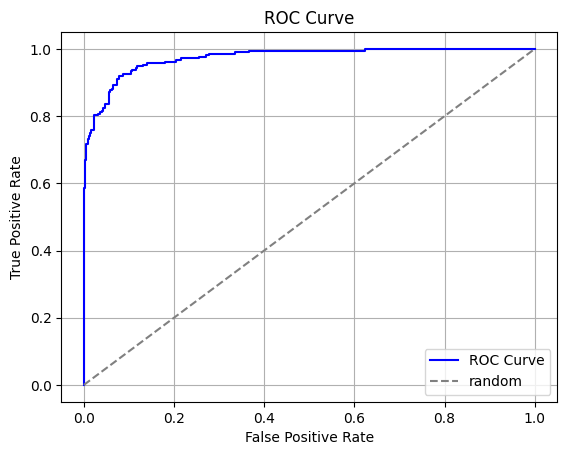

In [21]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

* ROC AUC 값

In [22]:
from sklearn.metrics import roc_auc_score

y_scores = model_lor.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_scores)

print(roc_auc)

0.97412927435125
